In [ ]:
# Step 1: Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Step 2: Load the dataset
file_path = '/content/mental-heath-in-tech-2016_20161114.csv'
df = pd.read_csv(file_path)


In [ ]:
# Step 3: Initial exploration of the dataset
print(df.info())  # Check for data types and missing values
print(df.describe())  # Summary statistics
print(df.head())  # First few rows to get an understanding of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [ ]:
# Step 4: Handling missing values
# Impute missing numerical values with mean and categorical with mode
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

In [ ]:
# Apply imputers
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [ ]:
# Step 5: Textual data standardization for "Have you had a mental health disorder in the past?"
# Standardize the column to Yes, No, and Uncertain (replacing Maybe)
df['Have you had a mental health disorder in the past?'] = df['Have you had a mental health disorder in the past?'].str.lower()
df['Have you had a mental health disorder in the past?'] = df['Have you had a mental health disorder in the past?'].replace('maybe', 'Uncertain')
df['Have you had a mental health disorder in the past?'] = df['Have you had a mental health disorder in the past?'].fillna('Uncertain')

In [ ]:
# Step 6: Dimensionality reduction (using PCA)
# Standardize the numerical features before applying PCA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include=[np.number]))

In [ ]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

In [ ]:
# Create a DataFrame for PCA results for visualization
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

In [ ]:
# Step 7: Clustering (using KMeans)
# Use KMeans to create clusters
kmeans = KMeans(n_clusters=3)  # Set the number of clusters to 3 (can be adjusted based on analysis)
kmeans.fit(pca_df)
pca_df['Cluster'] = kmeans.labels_

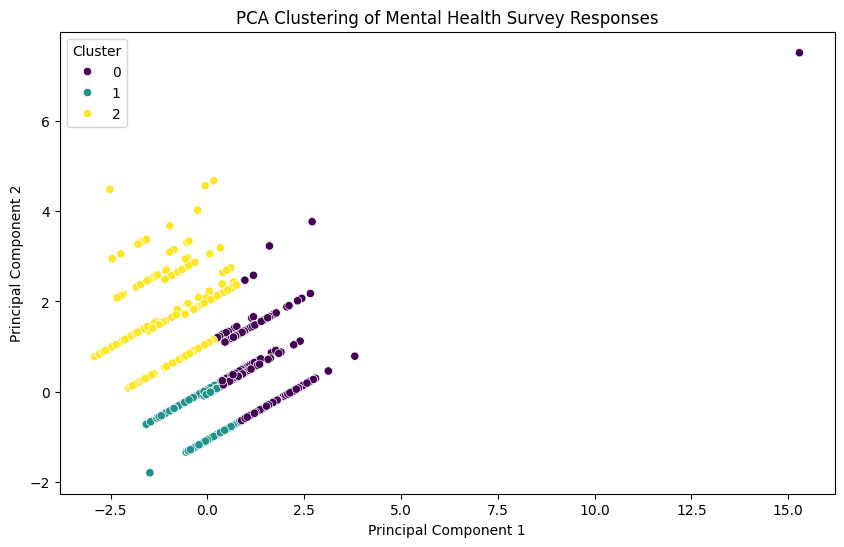

In [ ]:
# Step 8: Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Clustering of Mental Health Survey Responses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Step 9: Insights into each cluster
# Add the cluster labels to the original DataFrame
df['Cluster'] = pca_df['Cluster']

In [ ]:
# Step 9: Insights into each cluster
# Add the cluster labels to the original DataFrame
df['Cluster'] = pca_df['Cluster']



In [ ]:
# Get the summary statistics for numeric features only
numeric_cols = df.select_dtypes(include=[np.number]).columns
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()
print("Cluster Summary Statistics (for numeric columns):")
print(cluster_summary)

Cluster Summary Statistics (for numeric columns):
         Are you self-employed?  \
Cluster                           
0                      0.584239   
1                      0.005109   
2                      0.241135   

         Is your employer primarily a tech company/organization?  \
Cluster                                                            
0                                                 0.558855         
1                                                 0.959236         
2                                                 0.522675         

         Is your primary role within your company related to tech/IT?  \
Cluster                                                                 
0                                                 0.955044              
1                                                 0.945224              
2                                                 0.920934              

         Do you have medical coverage (private insurance or state-p

In [ ]:
# Check the distribution of "Have you had a mental health disorder in the past?" across clusters
print("Cluster-wise counts of Mental Health Disorder History:")
print(df.groupby(['Cluster', 'Have you had a mental health disorder in the past?']).size())



Cluster-wise counts of Mental Health Disorder History:
Cluster  Have you had a mental health disorder in the past?
0        Uncertain                                              63
         no                                                     63
         yes                                                   242
1        Uncertain                                             130
         no                                                    240
         yes                                                   413
2        Uncertain                                              53
         no                                                    148
         yes                                                    81
dtype: int64


In [ ]:
# Check the distribution of other categorical columns (if relevant)
print("Cluster-wise counts of other categorical columns:")
print(df.groupby(['Cluster']).size())  # Modify for other categorical fields as needed

Cluster-wise counts of other categorical columns:
Cluster
0    368
1    783
2    282
dtype: int64
